In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv(r"C:\Users\ASUS\Desktop\Q HARDWARE\NMR\dati oscilloscopio\T3DSO2354A_CSV_ALL_1.csv", skiprows=21)



In [54]:
#loading data times-voltages
x = df.iloc[:,0]
y_ch1 = df.iloc[:,1]
y_ch2 = df.iloc[:,2]
y_ch3 = df.iloc[:,3]
y_ch4 = df.iloc[:,4]


#pruning 
prune = 1

x1=x.iloc[::prune]
y_ch1_1=y_ch1.iloc[::prune]
y_ch2_1=y_ch2.iloc[::prune]
y_ch3_1=y_ch3.iloc[::prune]
y_ch4_1=y_ch4.iloc[::prune]

print(x1.shape, y_ch1_1.shape, y_ch2_1.shape, y_ch3_1.shape,y_ch4_1.shape)

#conversion to numeric
x1 = pd.to_numeric(x1)
y_ch1_1 = pd.to_numeric(y_ch1_1)
y_ch1_2 = pd.to_numeric(y_ch2_1)
y_ch1_3 = pd.to_numeric(y_ch3_1)
y_ch1_4 = pd.to_numeric(y_ch4_1)



(99990,) (99990,) (99990,) (99990,) (99990,)


Text(0.5, 1.0, 'prune: 1')

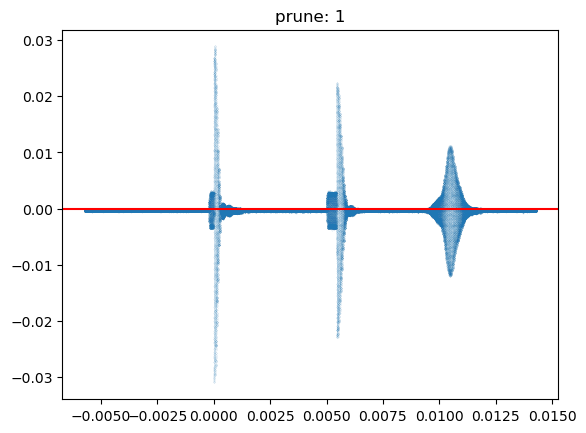

In [55]:
#plotting
plt.plot(x1,y_ch1_1,'-o', linewidth=0.05, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )
plt.title(f"prune: {prune}")


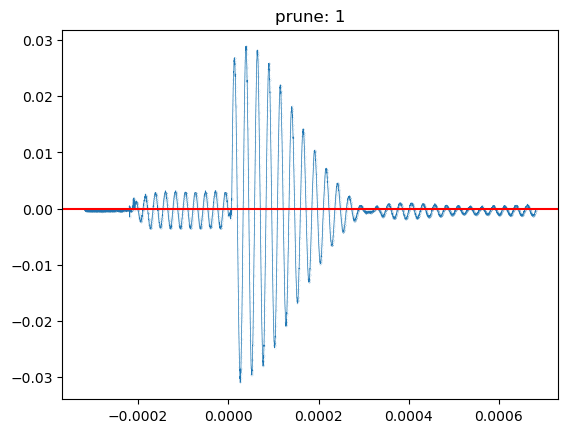

In [56]:

#ZOOOM plotting 
start = 27000
stop = 32000

plt.plot(x1[start:stop],y_ch1_1[start:stop],'-o', linewidth=0.5, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )

plt.title(f"prune: {prune}")
plt.show()

In [57]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Create a scatter plot
p = figure()

# Add scatter glyphs
p.scatter(x1[start:stop],y_ch1_1[start:stop])

# Add hover tool with cursor coordinates
hover = HoverTool(tooltips=[('x', '@x'), ('y', '@y')])
p.add_tools(hover)

# Show plot
show(p)


# FITTING pi/2

In [58]:
#sampled points from the exponential decay
x_fit = np.array([3.9E-05, 6.48E-05, 8.940E-05, 1.15E-04, 1.408E-04, 1.658E-04, 1.914E-04, 2.166E-04, 2.420E-04, 2.670E-04])
y_fit = np.array([2.875E-02, 2.817E-02, 2.583E-02, 2.2E-02, 1.817E-02, 1.417E-02, 1.042E-02, 7.167E-03, 4.500E-03, 2.167E-03])

df_fit = pd.DataFrame({'time':x_fit, 'voltage': y_fit})
df_fit

,time,voltage
0,0.000039,0.028750
1,0.000065,0.028170
2,0.000089,0.025830
3,0.000115,0.022000
4,0.000141,0.018170
5,0.000166,0.014170
6,0.000191,0.010420
7,0.000217,0.007167
8,0.000242,0.004500
9,0.000267,0.002167


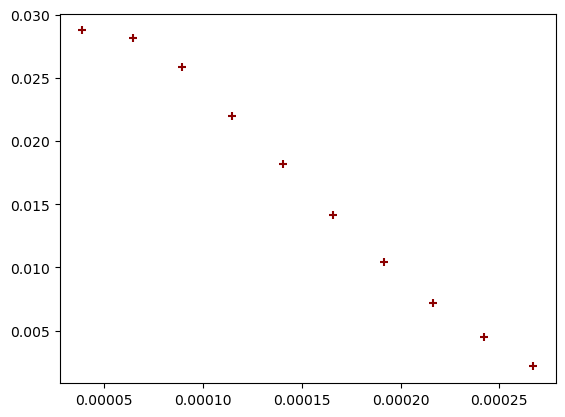

In [59]:
plt.scatter(x_fit,y_fit, marker='+', color="darkred")


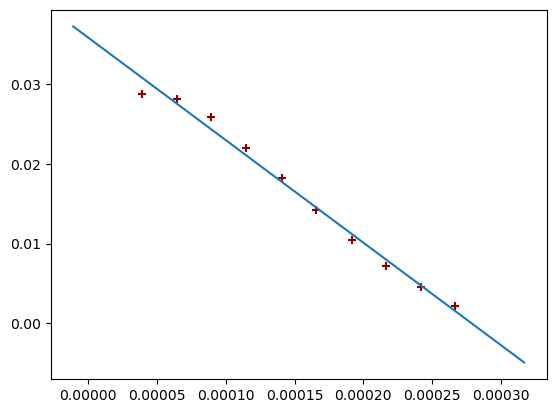

In [60]:
from scipy.stats import linregress

#without linearizing !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_fit)

plt.scatter(x_fit,y_fit, marker='+', color="darkred")

X=np.linspace(min(x_fit)-0.00005, max(x_fit)+0.00005, 10)
plt.plot(X, intercept + slope*X)


## FITTING echo

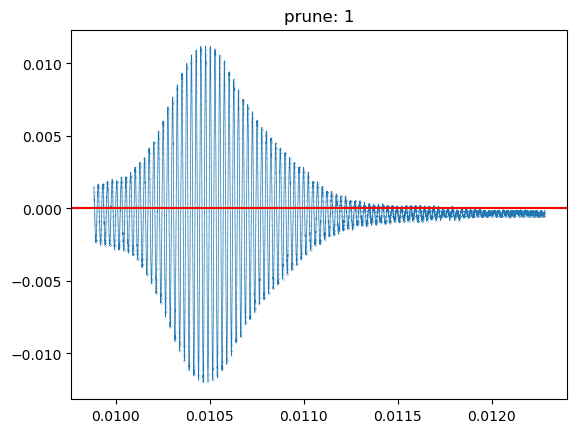

In [62]:

#ZOOOM plotting 
start = 78000
stop = 90000

plt.plot(x1[start:stop],y_ch1_1[start:stop],'-o', linewidth=0.5, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )

plt.title(f"prune: {prune}")
plt.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Create a scatter plot
p = figure()

# Add scatter glyphs
p.scatter(x1[start:stop],y_ch1_1[start:stop])

# Add hover tool with cursor coordinates
hover = HoverTool(tooltips=[('x', '@x'), ('y', '@y')])
p.add_tools(hover)

# Show plot
show(p)

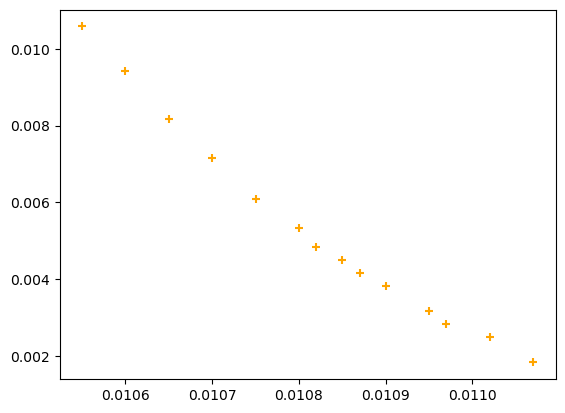

In [80]:
#sampled points from the exponential decay
x_fit = np.array([1.055E-02,1.060E-02,1.065E-02,1.070E-02,1.075E-02,1.080E-02,1.082E-02,1.085E-02,1.087E-02,1.090E-02,1.095E-02,1.097E-02,1.102E-02,1.107E-02])
y_fit = np.array([1.058E-02,9.417E-03,8.167E-03,7.167E-03,6.083E-03,5.333E-03,4.833E-03,4.5E-03,4.167E-03,3.833E-03,3.167E-03,2.833E-03,2.5E-03,1.833E-03])

df_fit = pd.DataFrame({'time':x_fit, 'voltage': y_fit})

plt.scatter(x_fit, y_fit, marker='+', color="orange")


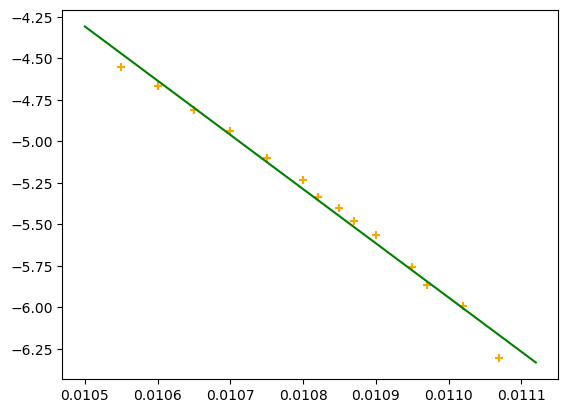

In [81]:
from scipy.stats import linregress

#linearizing data
y_lin = np.log(y_fit)

slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_lin)

plt.scatter(x_fit, y_lin, marker='+', color="orange")

X=np.linspace(min(x_fit)-0.00005, max(x_fit)+0.00005, 10)
plt.plot(X, intercept + slope*X, color="green")


In [82]:
T2_star = -1/slope
err = (1/(slope**2))*std_err
print("T2*: ", T2_star*10**3,  "ms +- ", err*10**3)
#valore trovato nella fft: 0.15 ms (150 us)



T2*:  0.3063358875524646 ms +-  0.009089407898713745


## ESCURSION : field inhomogeneity

In [1]:
#inseriti a mano!!
gamma = 42.5756 #MHz/T 
T2star = 0.1E-03 #seconds
T2 = 32.8E-03
deltaB=  (1/T2star - 1/T2 ) / gamma  #result in uT (microtesla)

print(deltaB*10**-3, "mT (millitesla)")

0.23416022780940143 mT (millitesla)
